## Global Power Plant Database
### Problem Statement:
#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [5]:
#import required libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import LabelEncoder

from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer,StandardScaler 

#Regression Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

#classification models
from  sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score


## Exploratory Data Analysis

### Getting the Data

In [7]:
gp=pd.read_csv(r'C:\Users\SREEDHAR\Documents\Data science\ML projects\database_IND.csv')
gp

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#checking the shape of Dataset: number of rows and columns
gp.shape

(908, 25)

In [9]:
#overview of the datasets, different type of datatypes available
gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [10]:
#checking the statistics of the dataset to perform the data analysis
gp.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [11]:
#printing the unique values available in the dataset
for i in gp.columns:
    print(gp[i].value_counts())
    print('*'*70)

IND    908
Name: country, dtype: int64
**********************************************************************
India    908
Name: country_long, dtype: int64
**********************************************************************
CHAKABURA TPP                       1
Dhabla Sondhya Solar Power Plant    1
NORTH CHENNAI EXTENSION             1
SHRI SHANKAR                        1
TORANGALLU EXT                      1
                                   ..
WARDHA WARORA(Sai Wardha Power)     1
GHTP (LEH.MOH.)                     1
Patan Taluka Wind Farm              1
CHANDRAPUR GUPTA                    1
GANDHI SAGAR                        1
Name: name, Length: 908, dtype: int64
**********************************************************************
WRI1026145    1
WRI1026083    1
IND0000530    1
IND0000411    1
WRI1019992    1
             ..
IND0000177    1
WRI1019965    1
WRI1019969    1
WRI1019979    1
WRI1019972    1
Name: gppd_idnr, Length: 908, dtype: int64
***************************

In [12]:
#checking all the column names available 
gp.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [13]:
#checking the number of null values present in each columns 
gp.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

## Observations:

1. There are a lot number of misisng values in the data set, Lattitude, Longitude have 46 missing values,other_fuel has nearly 90% of missing values in column ,generation_gwh data has 50% of missing values
2. Country and country long has 1 unique value which has no inference on Analysis.
3. gppd_idnr indicates unique id for power plant, hence not required
4. url of powerplant is website required to contact the company which has no use in prediction.
5. 'generation_data_source' has only 1 value and other is NaN, so instead of replacing missing values it is good to remove the column.
6. 'year_of_capacity_data','other_fuel2' has 1 value and 'other_fuel3, 'wepp_id', 'estimated_generation_gwh' has only null values.

These above attributes can be directly removed from data set.

### Checking the correlation of the attributes:

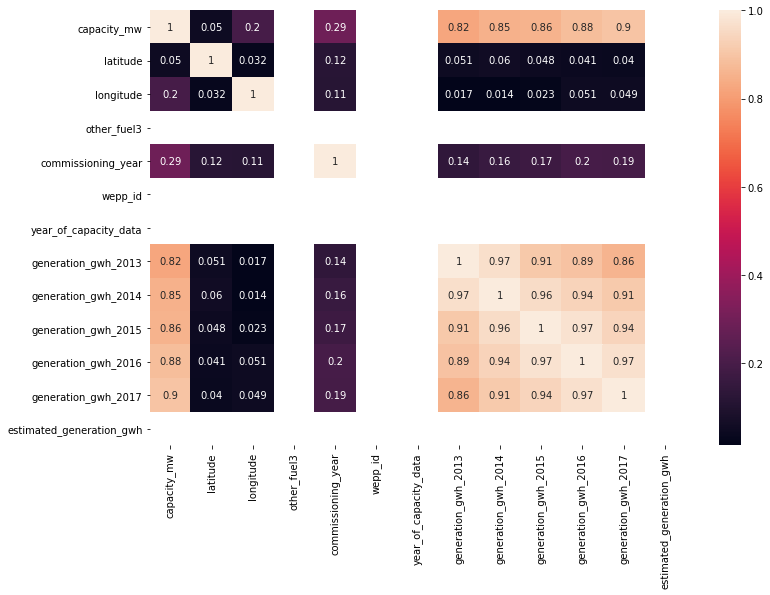

In [14]:
#how the attributes are related to each other can be seen by plotting the heatmap over the attributes correlation value
corr = gp.corr()
plt.figure(figsize=(12,8), facecolor='white')
sns.heatmap(corr, annot=True)
plt.show()

In [15]:
#dropping the unwanted columns which are having no related information for data analysis
gp.drop(columns=['country','country_long','gppd_idnr','url','generation_data_source','other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','year_of_capacity_data'], inplace=True)
gp.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


11 columns were having the data which was not relavant to perform the data analysis.

Let us check the unique values and categorical values again to perform EDA efficiently 

In [16]:
for i in gp.columns:
    if(gp[i].dtype == 'object'):
        print(gp[i].value_counts())
        print('*'*60)

CHAKABURA TPP                       1
Dhabla Sondhya Solar Power Plant    1
NORTH CHENNAI EXTENSION             1
SHRI SHANKAR                        1
TORANGALLU EXT                      1
                                   ..
WARDHA WARORA(Sai Wardha Power)     1
GHTP (LEH.MOH.)                     1
Patan Taluka Wind Farm              1
CHANDRAPUR GUPTA                    1
GANDHI SAGAR                        1
Name: name, Length: 908, dtype: int64
************************************************************
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
************************************************************
Acc Acc ltd                                  4
Sterling Agro Industries ltd.                4
Jk Cement ltd                                4
Hindustan Zinc ltd                           3
Enercon India Ltd.                           3
                                  

## Data Visualization
Let us analyse the relation between the attributes and how the attribute vary based on individual attributes
### Univariate Analysis

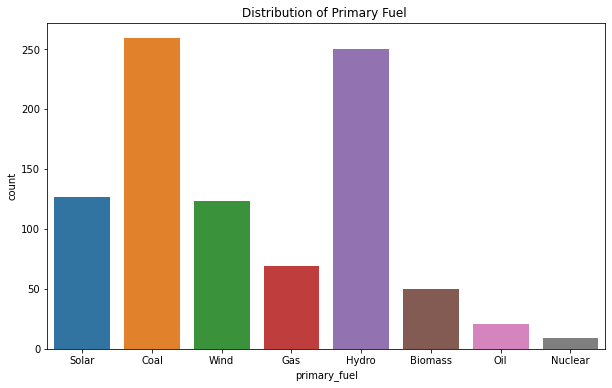

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='primary_fuel', data=gp,)
plt.title("Distribution of Primary Fuel ")

plt.show()

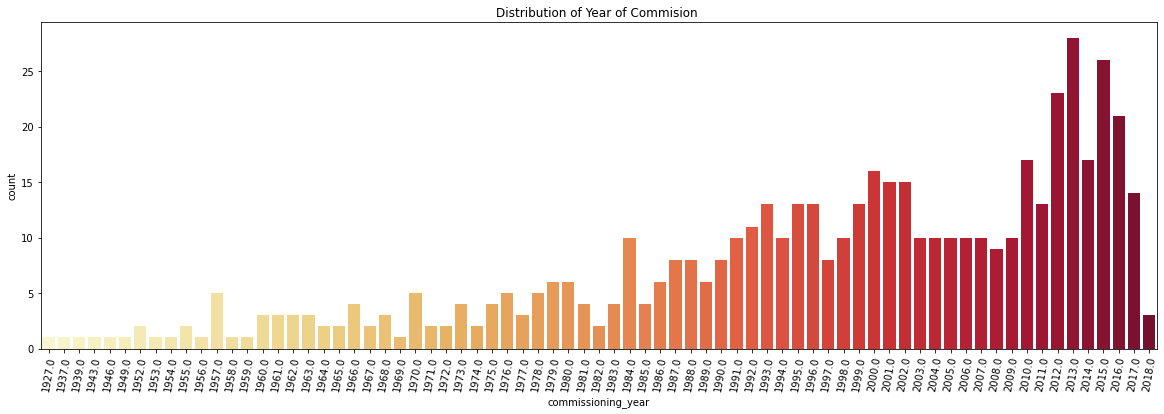

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x='commissioning_year', data=gp,palette='YlOrRd')
plt.xlabel('commissioning_year')
plt.xticks(rotation=80)
plt.title("Distribution of Year of Commision ")
plt.show()

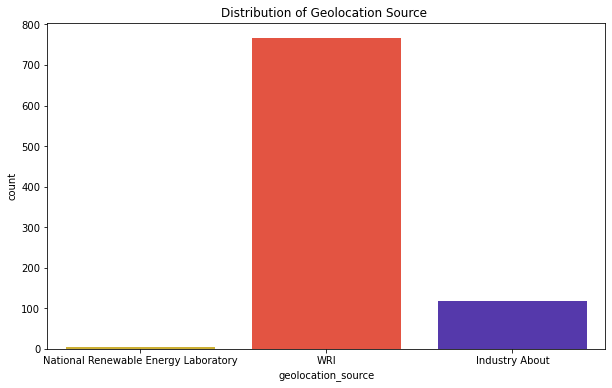

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='geolocation_source', data=gp,palette='CMRmap_r')
plt.title("Distribution of Geolocation Source ")
plt.show()

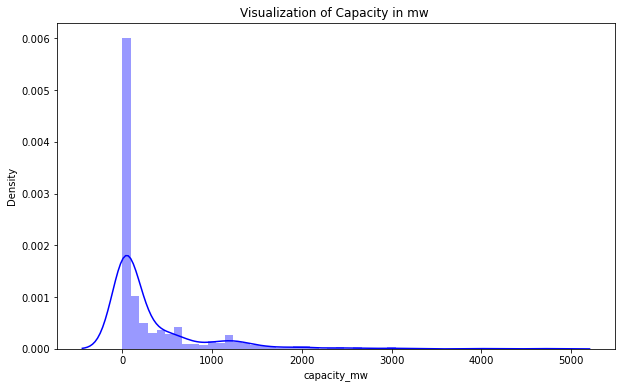

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(gp['capacity_mw'],color='blue')
plt.title("Visualization of Capacity in mw ")
plt.show()

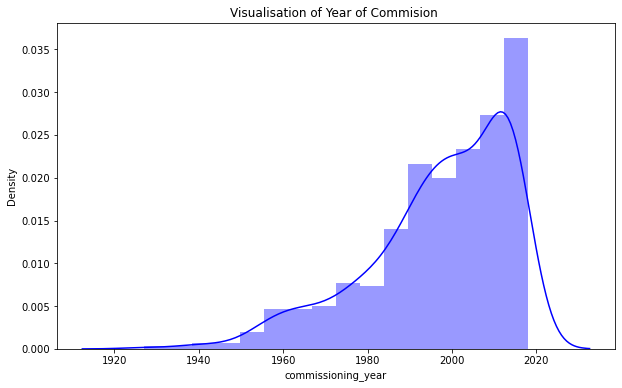

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(gp['commissioning_year'],color='blue')
plt.title("Visualisation of Year of Commision ")
plt.show()

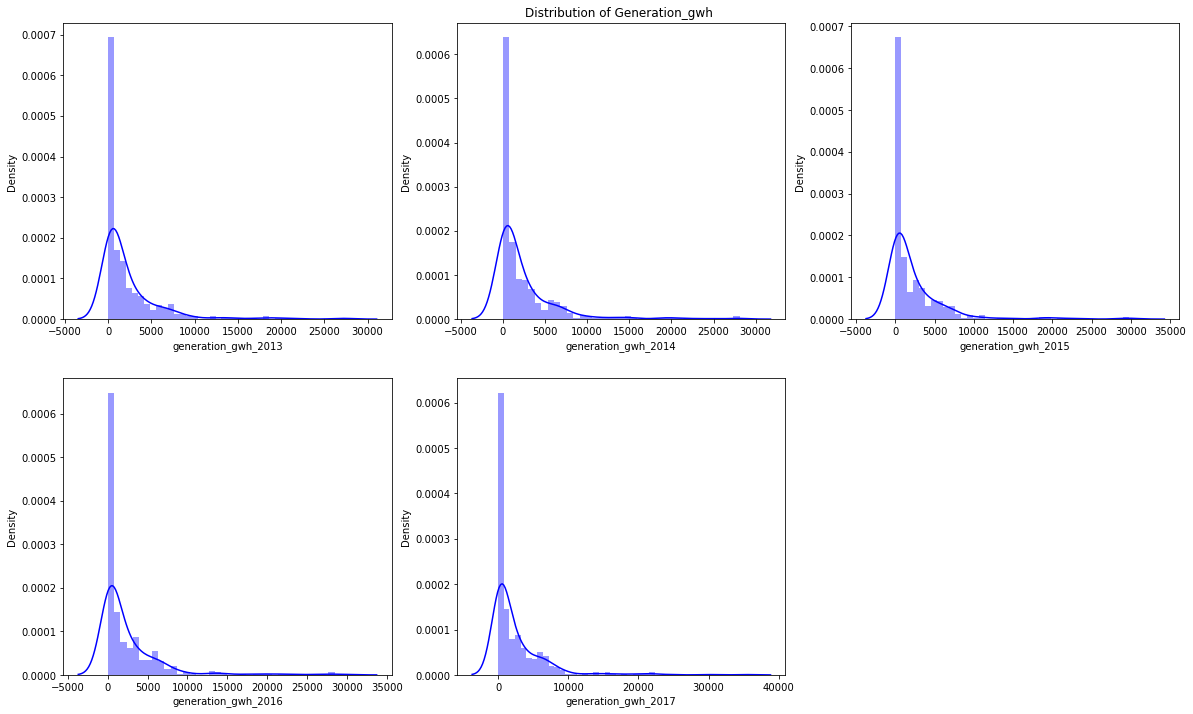

In [22]:
plt.figure(figsize=(20,12))
ax= plt.subplot(2,3,1)
sns.distplot(gp['generation_gwh_2013'],color='blue')

ax= plt.subplot(2,3,2)
sns.distplot(gp['generation_gwh_2014'],color='blue')
plt.title("Distribution of Generation_gwh ")

ax= plt.subplot(2,3,3)
sns.distplot(gp['generation_gwh_2015'],color='blue')

ax= plt.subplot(2,3,4)
sns.distplot(gp['generation_gwh_2016'],color='blue')

ax= plt.subplot(2,3,5)
sns.distplot(gp['generation_gwh_2017'],color='blue')


plt.show()

## Observations:
Based on univariate analysis we get to know the following points
1. Coal is majorly contrbutor fuel for the power generation followed by Hydropower.
2. After 2000 the power plants have increased in huge number.
3. Major of Power plant generations unit are producing at average varying in 100-1000
4. There are more number of outliers in capacity and generation_gwh data and the graph is having skewness.

### Bi-variate Analysis

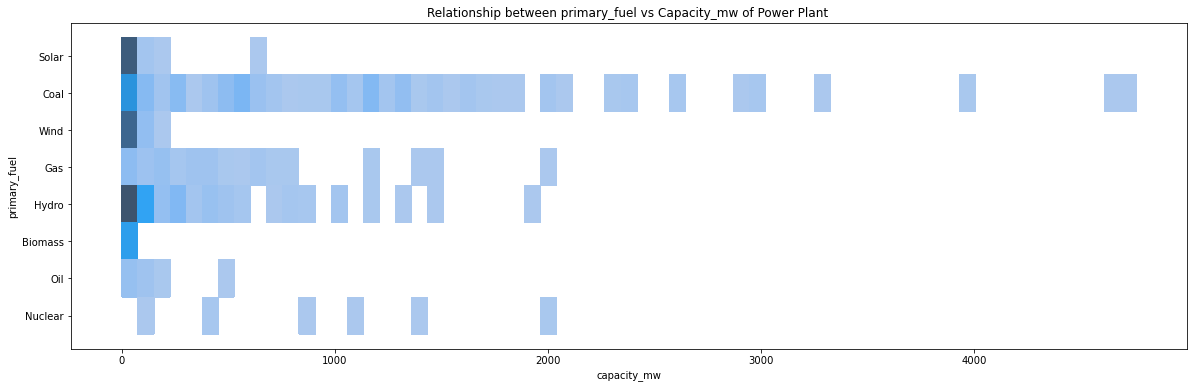

In [23]:
plt.figure(figsize=(20,6))
sns.histplot(x='capacity_mw',y='primary_fuel', data=gp,palette='YlOrRd_r')
plt.title("Relationship between primary_fuel vs Capacity_mw of Power Plant ")

plt.show()

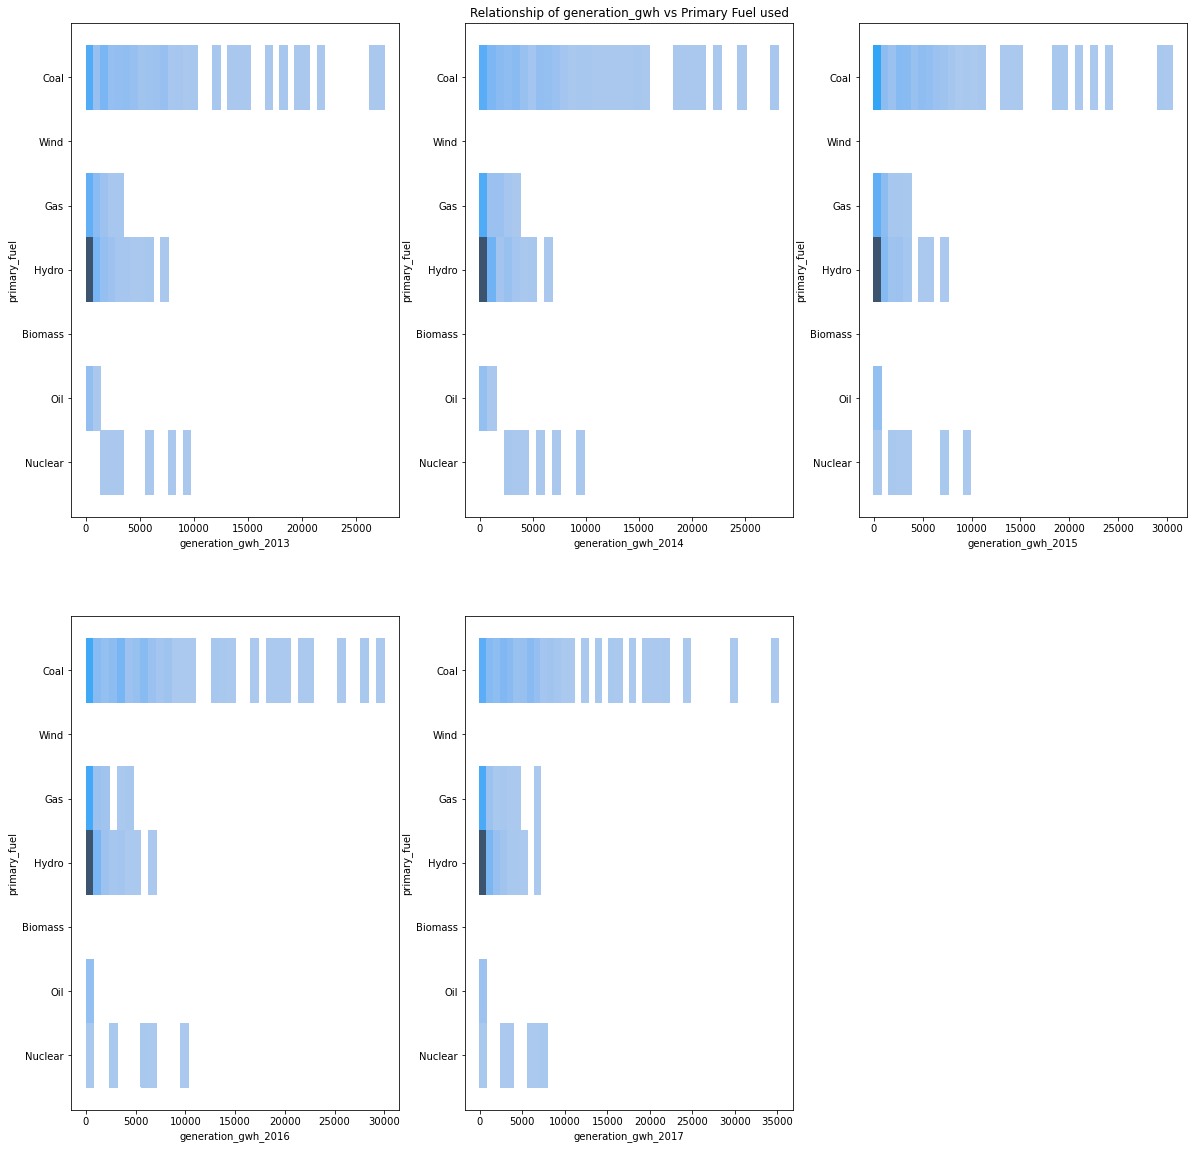

In [24]:
plt.figure(figsize=(20,20))
ax = plt.subplot(2,3,1)
sns.histplot(x='generation_gwh_2013',y='primary_fuel', data=gp)
ax = plt.subplot(2,3,2)
sns.histplot(x='generation_gwh_2014',y='primary_fuel', data=gp)
plt.title("Relationship of generation_gwh vs Primary Fuel used")

ax = plt.subplot(2,3,3)
sns.histplot(x='generation_gwh_2015',y='primary_fuel', data=gp,)
ax = plt.subplot(2,3,4)
sns.histplot(x='generation_gwh_2016',y='primary_fuel', data=gp)
ax = plt.subplot(2,3,5)
sns.histplot(x='generation_gwh_2017',y='primary_fuel', data=gp)
plt.show()

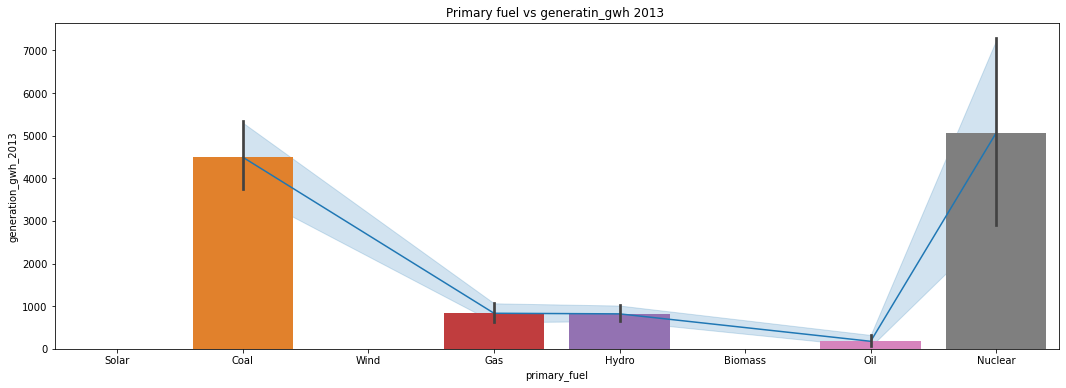

In [25]:
plt.figure(figsize=(18,6))
ax = (2,1,1)
sns.lineplot(x='primary_fuel',y='generation_gwh_2013', data=gp)

ax = (2,1,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2013', data=gp)
plt.title("Primary fuel vs generatin_gwh 2013 ")

plt.show()

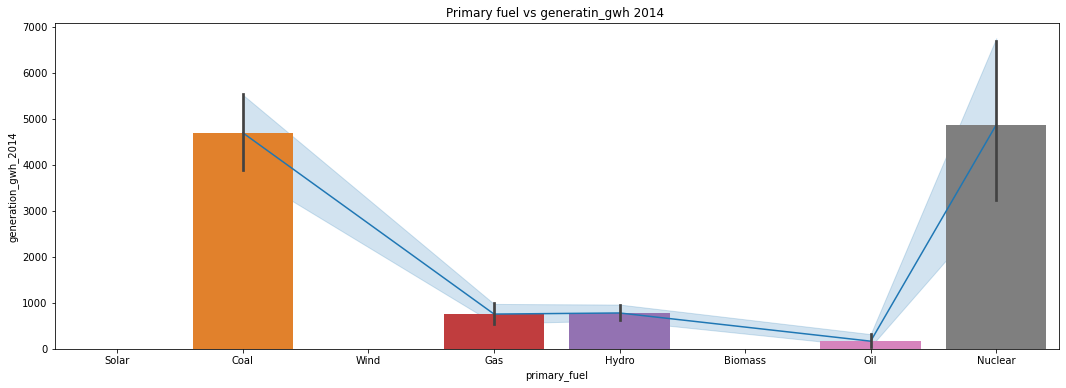

In [26]:
plt.figure(figsize=(18,6))
ax = (1,2,1)
sns.lineplot(x='primary_fuel',y='generation_gwh_2014', data=gp)

ax = (1,2,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2014', data=gp)
plt.title("Primary fuel vs generatin_gwh 2014 ")

plt.show()

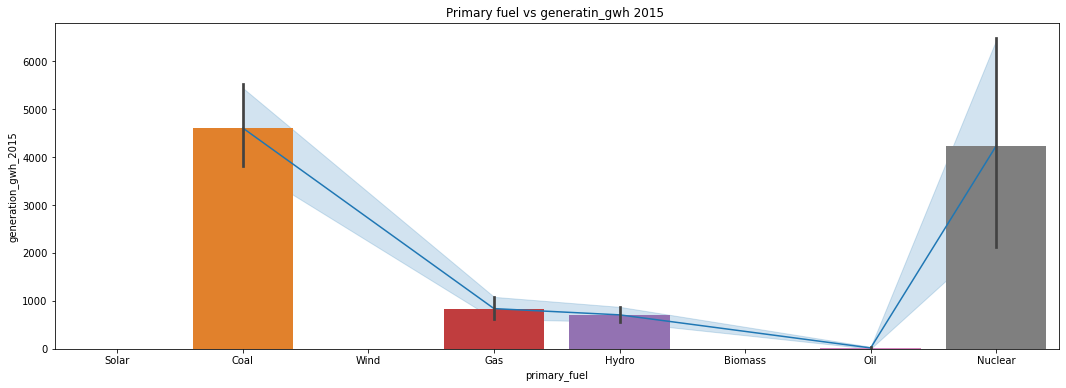

In [27]:
plt.figure(figsize=(18,6))
ax = (1,2,1)
sns.lineplot(x='primary_fuel',y='generation_gwh_2015', data=gp)

ax = (1,2,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2015', data=gp)
plt.title("Primary fuel vs generatin_gwh 2015 ")

plt.show()

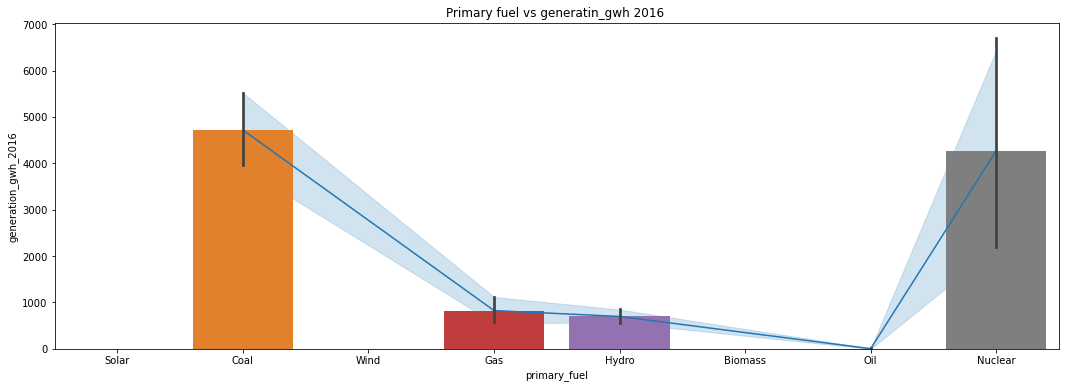

In [28]:
plt.figure(figsize=(18,6))
ax = (1,2,1)
sns.lineplot(x='primary_fuel',y='generation_gwh_2016', data=gp)

ax = (1,2,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2016', data=gp)
plt.title("Primary fuel vs generatin_gwh 2016 ")

plt.show()

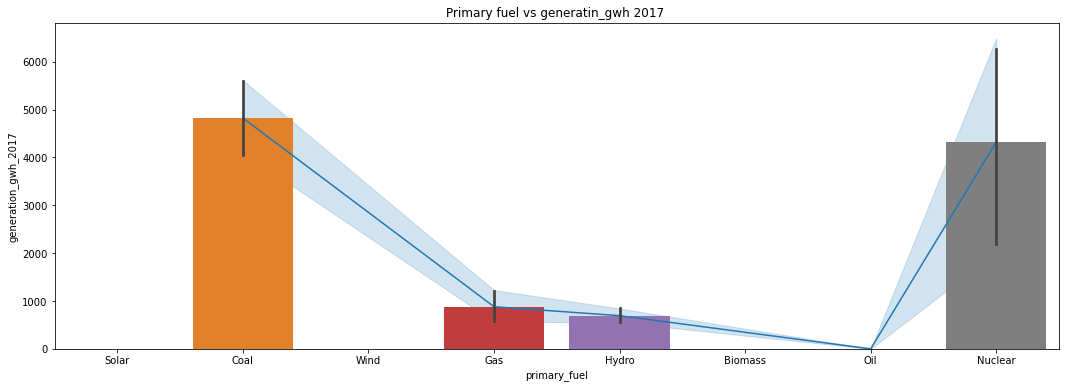

In [29]:
plt.figure(figsize=(18,6))
ax = (1,2,1)
sns.lineplot(x='primary_fuel',y='generation_gwh_2017', data=gp)

ax = (1,2,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2017', data=gp)
plt.title("Primary fuel vs generatin_gwh 2017 ")

plt.show()

<Figure size 720x720 with 0 Axes>

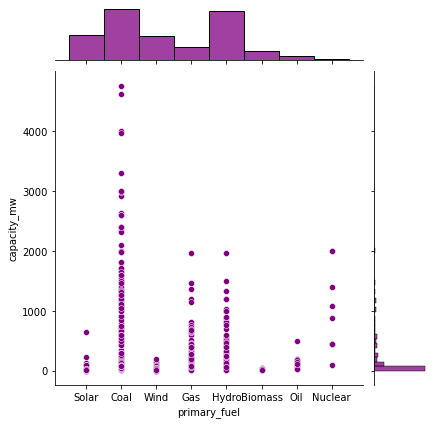

In [30]:
plt.figure(figsize=(10,10))
sns.jointplot(x=gp['primary_fuel'],y=gp['capacity_mw'],color='purple')
plt.show()

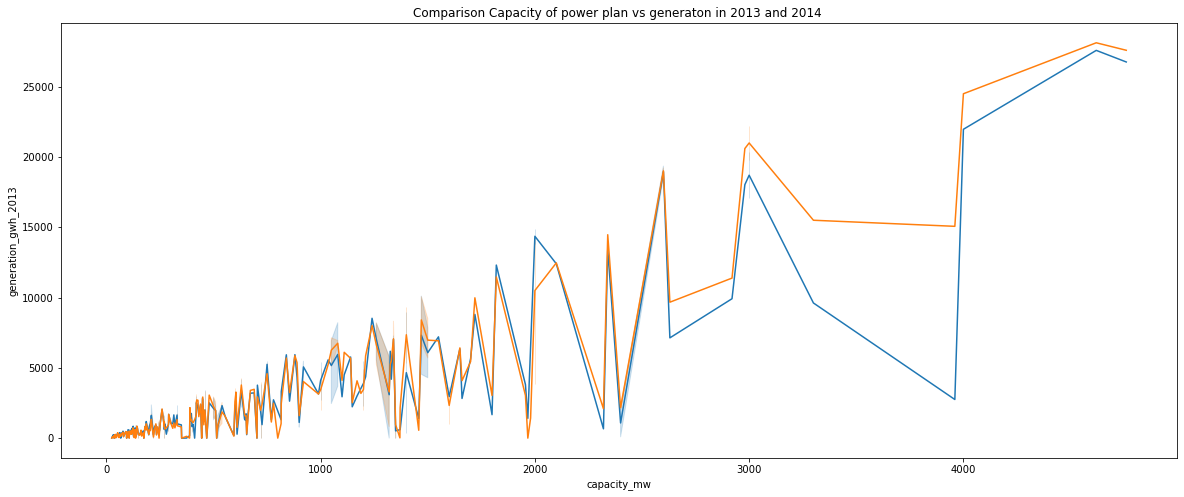

In [31]:
plt.figure(figsize=(20,8))
sns.lineplot(x='capacity_mw',y='generation_gwh_2013', data=gp)
sns.lineplot(x='capacity_mw',y='generation_gwh_2014', data=gp)
plt.title("Comparison Capacity of power plan vs generaton in 2013 and 2014 ")
plt.show()

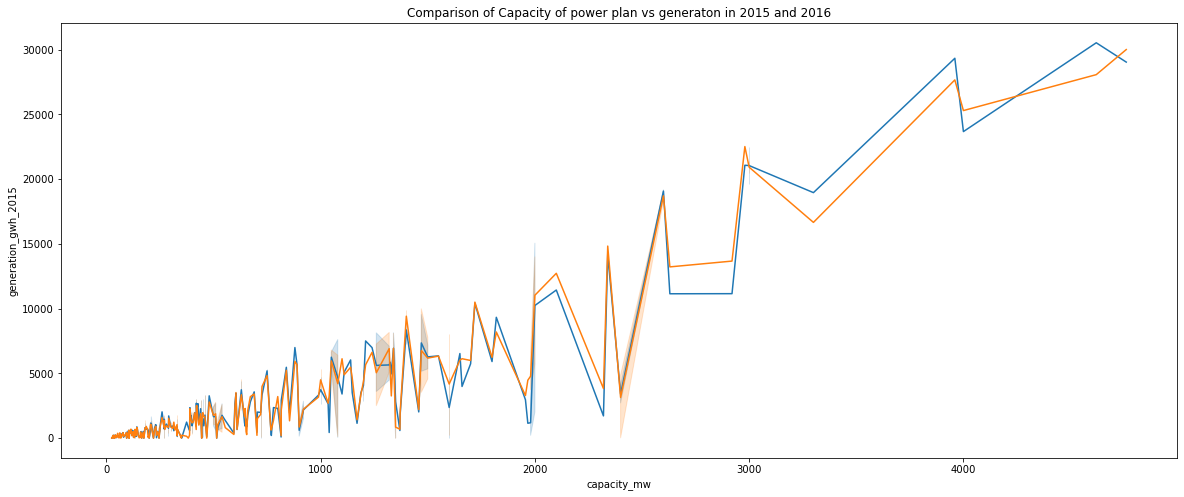

In [32]:
plt.figure(figsize=(20,8))
sns.lineplot(x='capacity_mw',y='generation_gwh_2015', data=gp)
sns.lineplot(x='capacity_mw',y='generation_gwh_2016', data=gp)
plt.title("Comparison of Capacity of power plan vs generaton in 2015 and 2016")
plt.show()

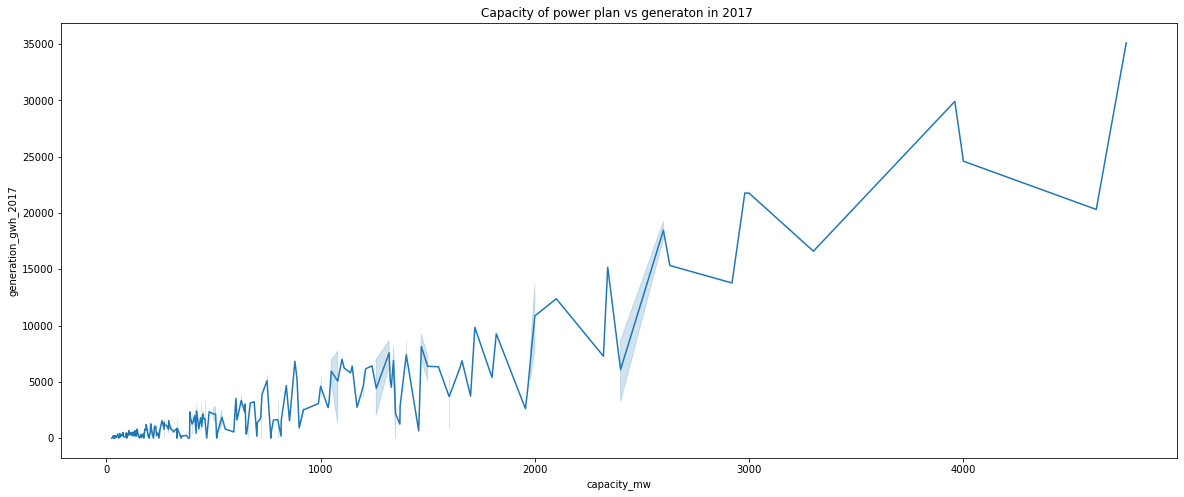

In [33]:
plt.figure(figsize=(20,8))
sns.lineplot(x='capacity_mw',y='generation_gwh_2017', data=gp)
plt.title("Capacity of power plan vs generaton in 2017 ")
plt.show()

## Observations:
Based on Bi-variate analysis we can point that,

1. Coal is the major contributor in generation of power in all the years.
2. In all the years nuclear fuel has also contributed next to coal in generation.
3. Capacity_mw and generation_gwh are linearly related based on the data graphed from 2013 to 2017.

### Multi-variate Analysis

<Figure size 720x576 with 0 Axes>

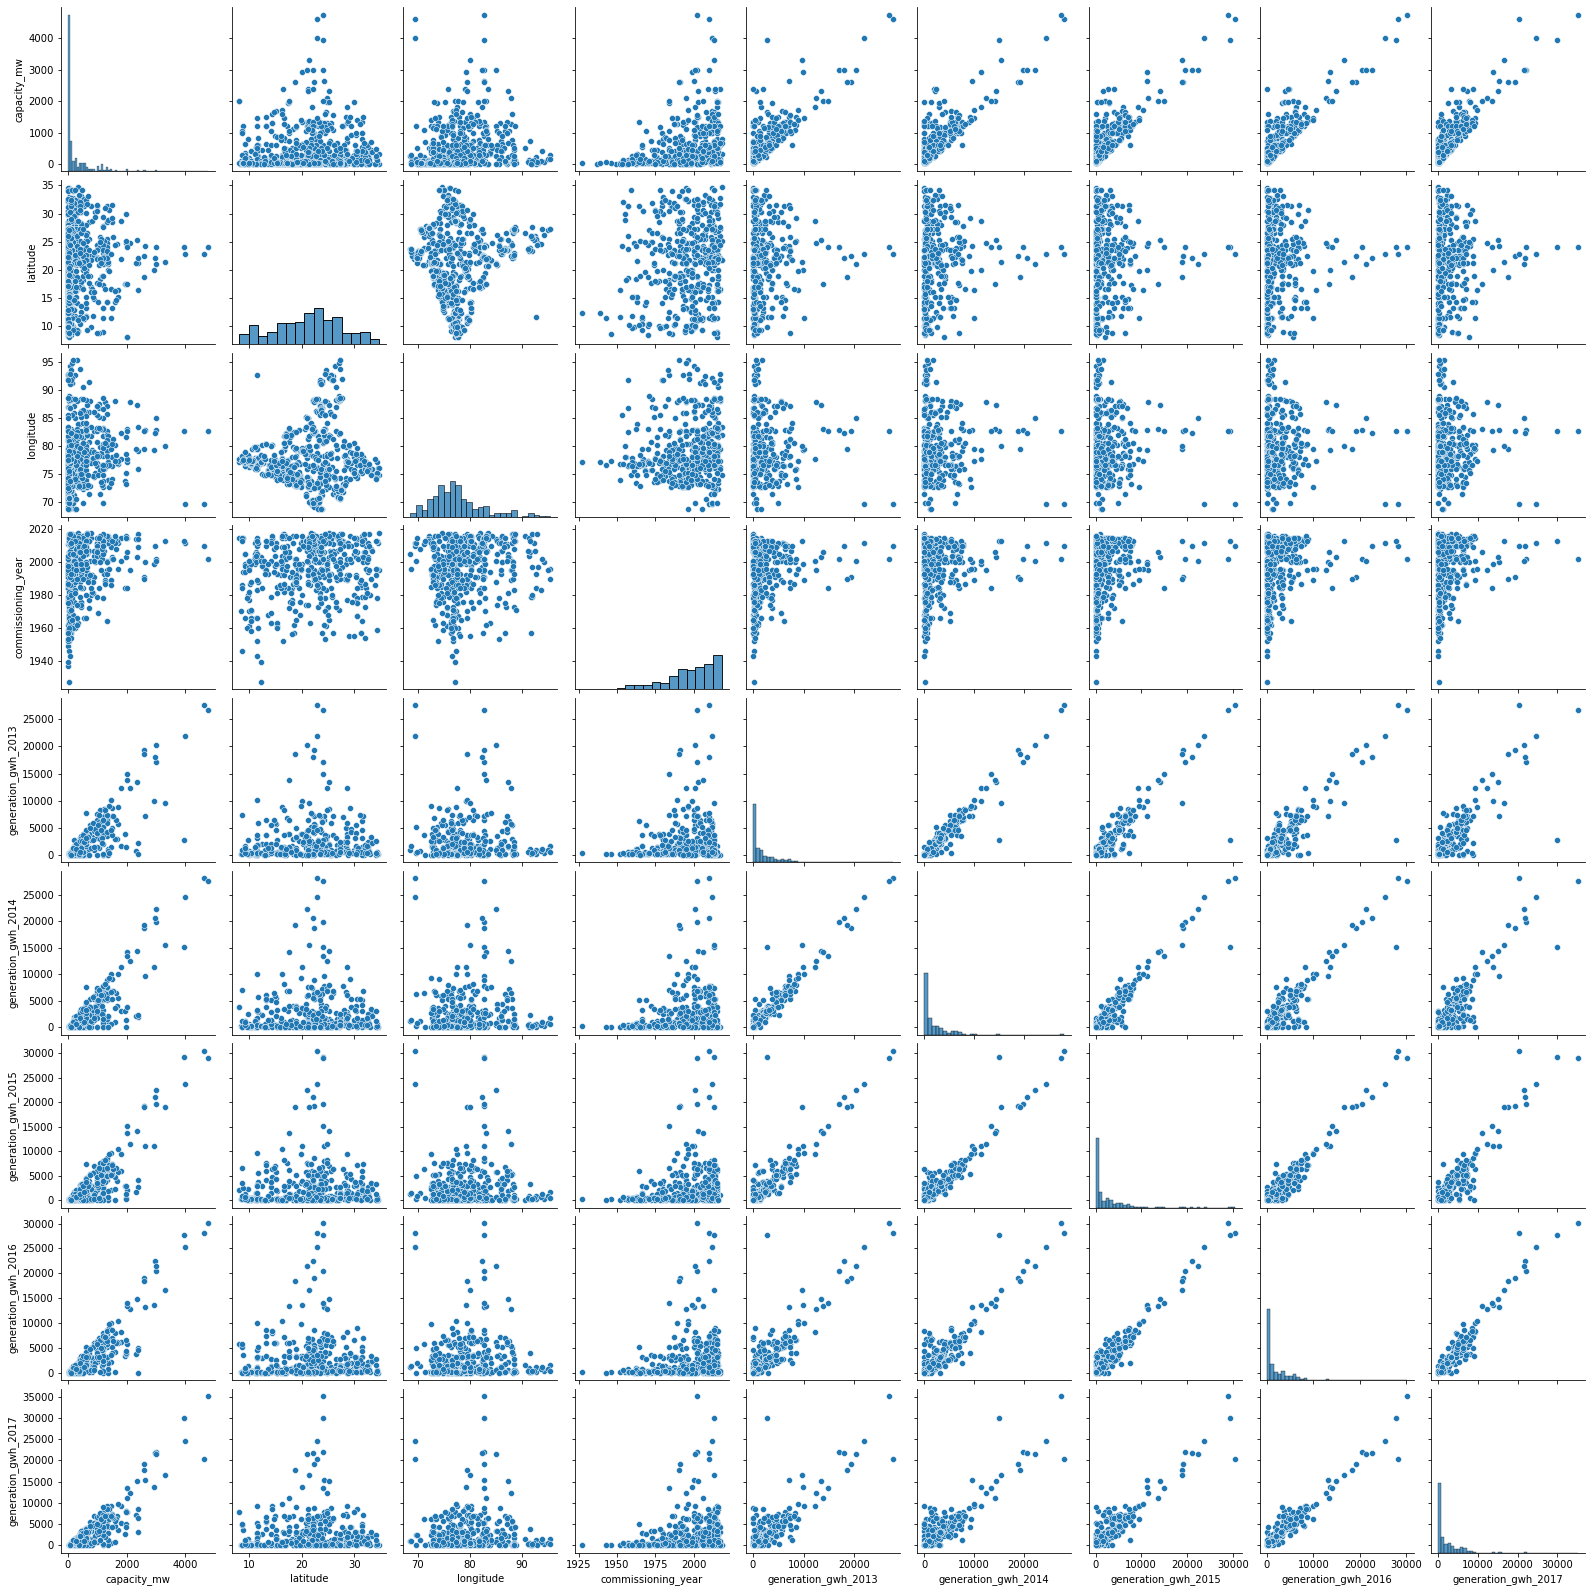

In [34]:
plt.figure(figsize=(10,8))
sns.pairplot(gp)
plt.show()

## Observations
1. The power plants are distributed all over the India normally.
2. We can see linear relation ship in between the most of attributes mentioned.


### Let us proceed with Treating missing values and converting categorical data into numerical data

In [35]:
#filling the missing values
print(gp.isnull().sum())
print('\n',gp.dtypes)

name                     0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  566
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

 name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object


In [36]:
#filling missing values of lattitude and longitude with the respective means.
gp['latitude'].fillna(gp['latitude'].mean(),inplace=True)
gp['longitude'].fillna(gp['latitude'].mean(),inplace=True)

In [37]:
#converting the categorical values into numerical values by encoding methods
lab_enc = LabelEncoder()

gp1=lab_enc.fit_transform(gp['primary_fuel'])
gp2 = lab_enc.fit_transform(gp['geolocation_source'])

In [38]:
pd.Series(gp1)
gp['primary_fuel']=gp1
gp['geolocation_source']=gp2

In [39]:
#checking the datatypes again
gp.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
owner                   object
source                  object
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [40]:
gp['generation_gwh_2013'].fillna(gp['generation_gwh_2013'].median(),inplace=True)
gp['generation_gwh_2014'].fillna(gp['generation_gwh_2014'].median(),inplace=True)
gp['generation_gwh_2015'].fillna(gp['generation_gwh_2015'].median(),inplace=True)
gp['generation_gwh_2016'].fillna(gp['generation_gwh_2016'].median(),inplace=True)
gp['generation_gwh_2017'].fillna(gp['generation_gwh_2017'].median(),inplace=True)
gp['commissioning_year'].fillna(gp['commissioning_year'].median(), inplace=True)

In [41]:
gp.isna().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                  566
source                   0
geolocation_source       0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [42]:
gp.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
owner                   object
source                  object
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

Further droping other categorical data from the dataset as these are not usefull for analysis, (Name, Owner, Source).

In [43]:
gp.drop(columns=['name','owner','source'], inplace=True)

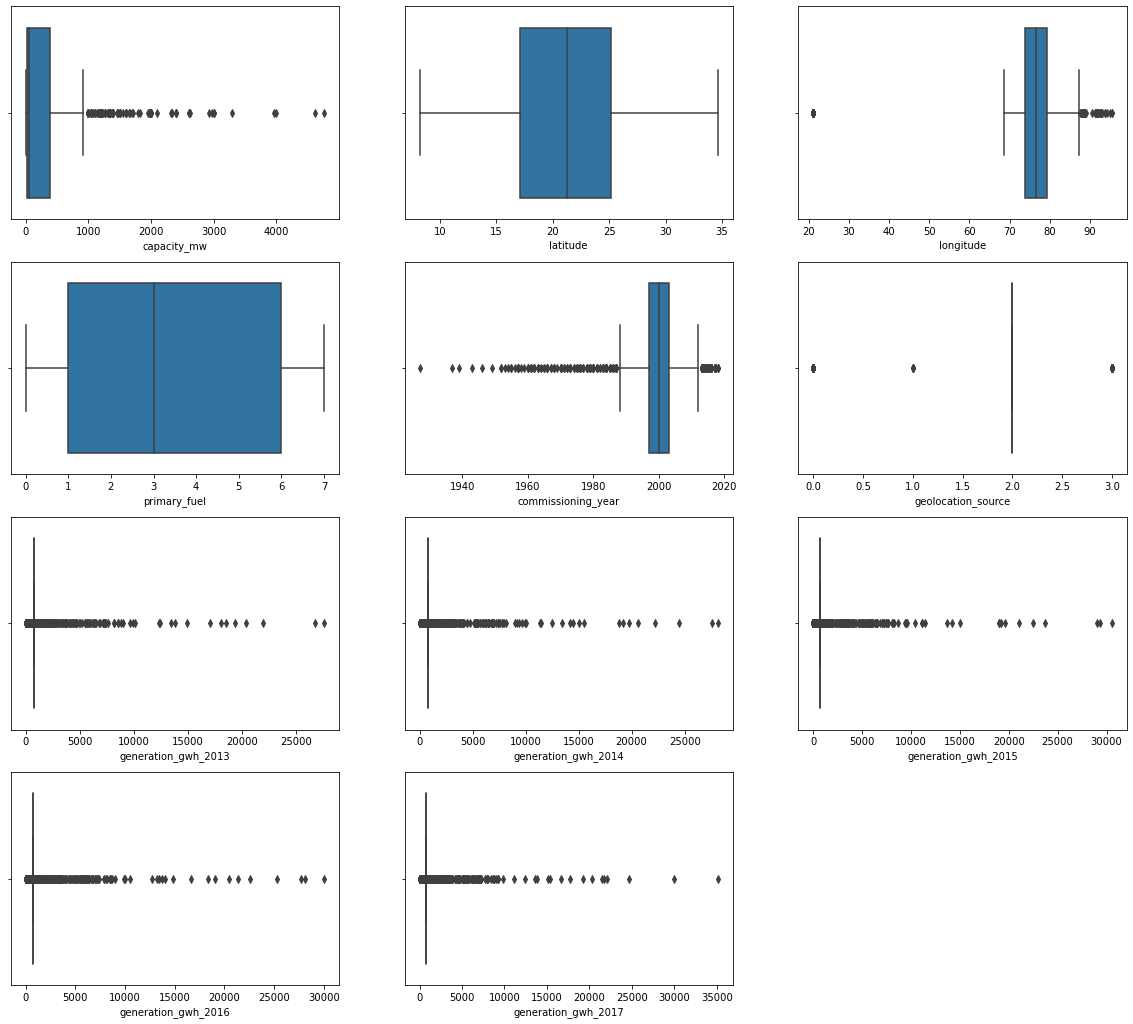

In [44]:
plt.figure(figsize=(20,18))
plotnum=1
for i in gp.columns:
    ax = plt.subplot(4,3,plotnum)
    sns.boxplot(gp[i]) 
    plotnum+=1
plt.show()

Capacity_mw, commision_year, generation_gwh geolocation sourcem longitude has outliers and skewness in the data it need to be treated with some Transformation techniques.

In [45]:
print('before removal of outliers',gp.shape)
z_score = zscore(gp)
abs_sc = np.abs(z_score)
gp = gp[(abs_sc<3).all(axis=1)]
print('after removal of outliers',gp.shape)

before removal of outliers (908, 11)
after removal of outliers (822, 11)


In [46]:
pwr_tfr = PowerTransformer(method='yeo-johnson')
col = ['capacity_mw', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','geolocation_source','longitude']
gp[col] = pwr_tfr.fit_transform(gp[col].values)

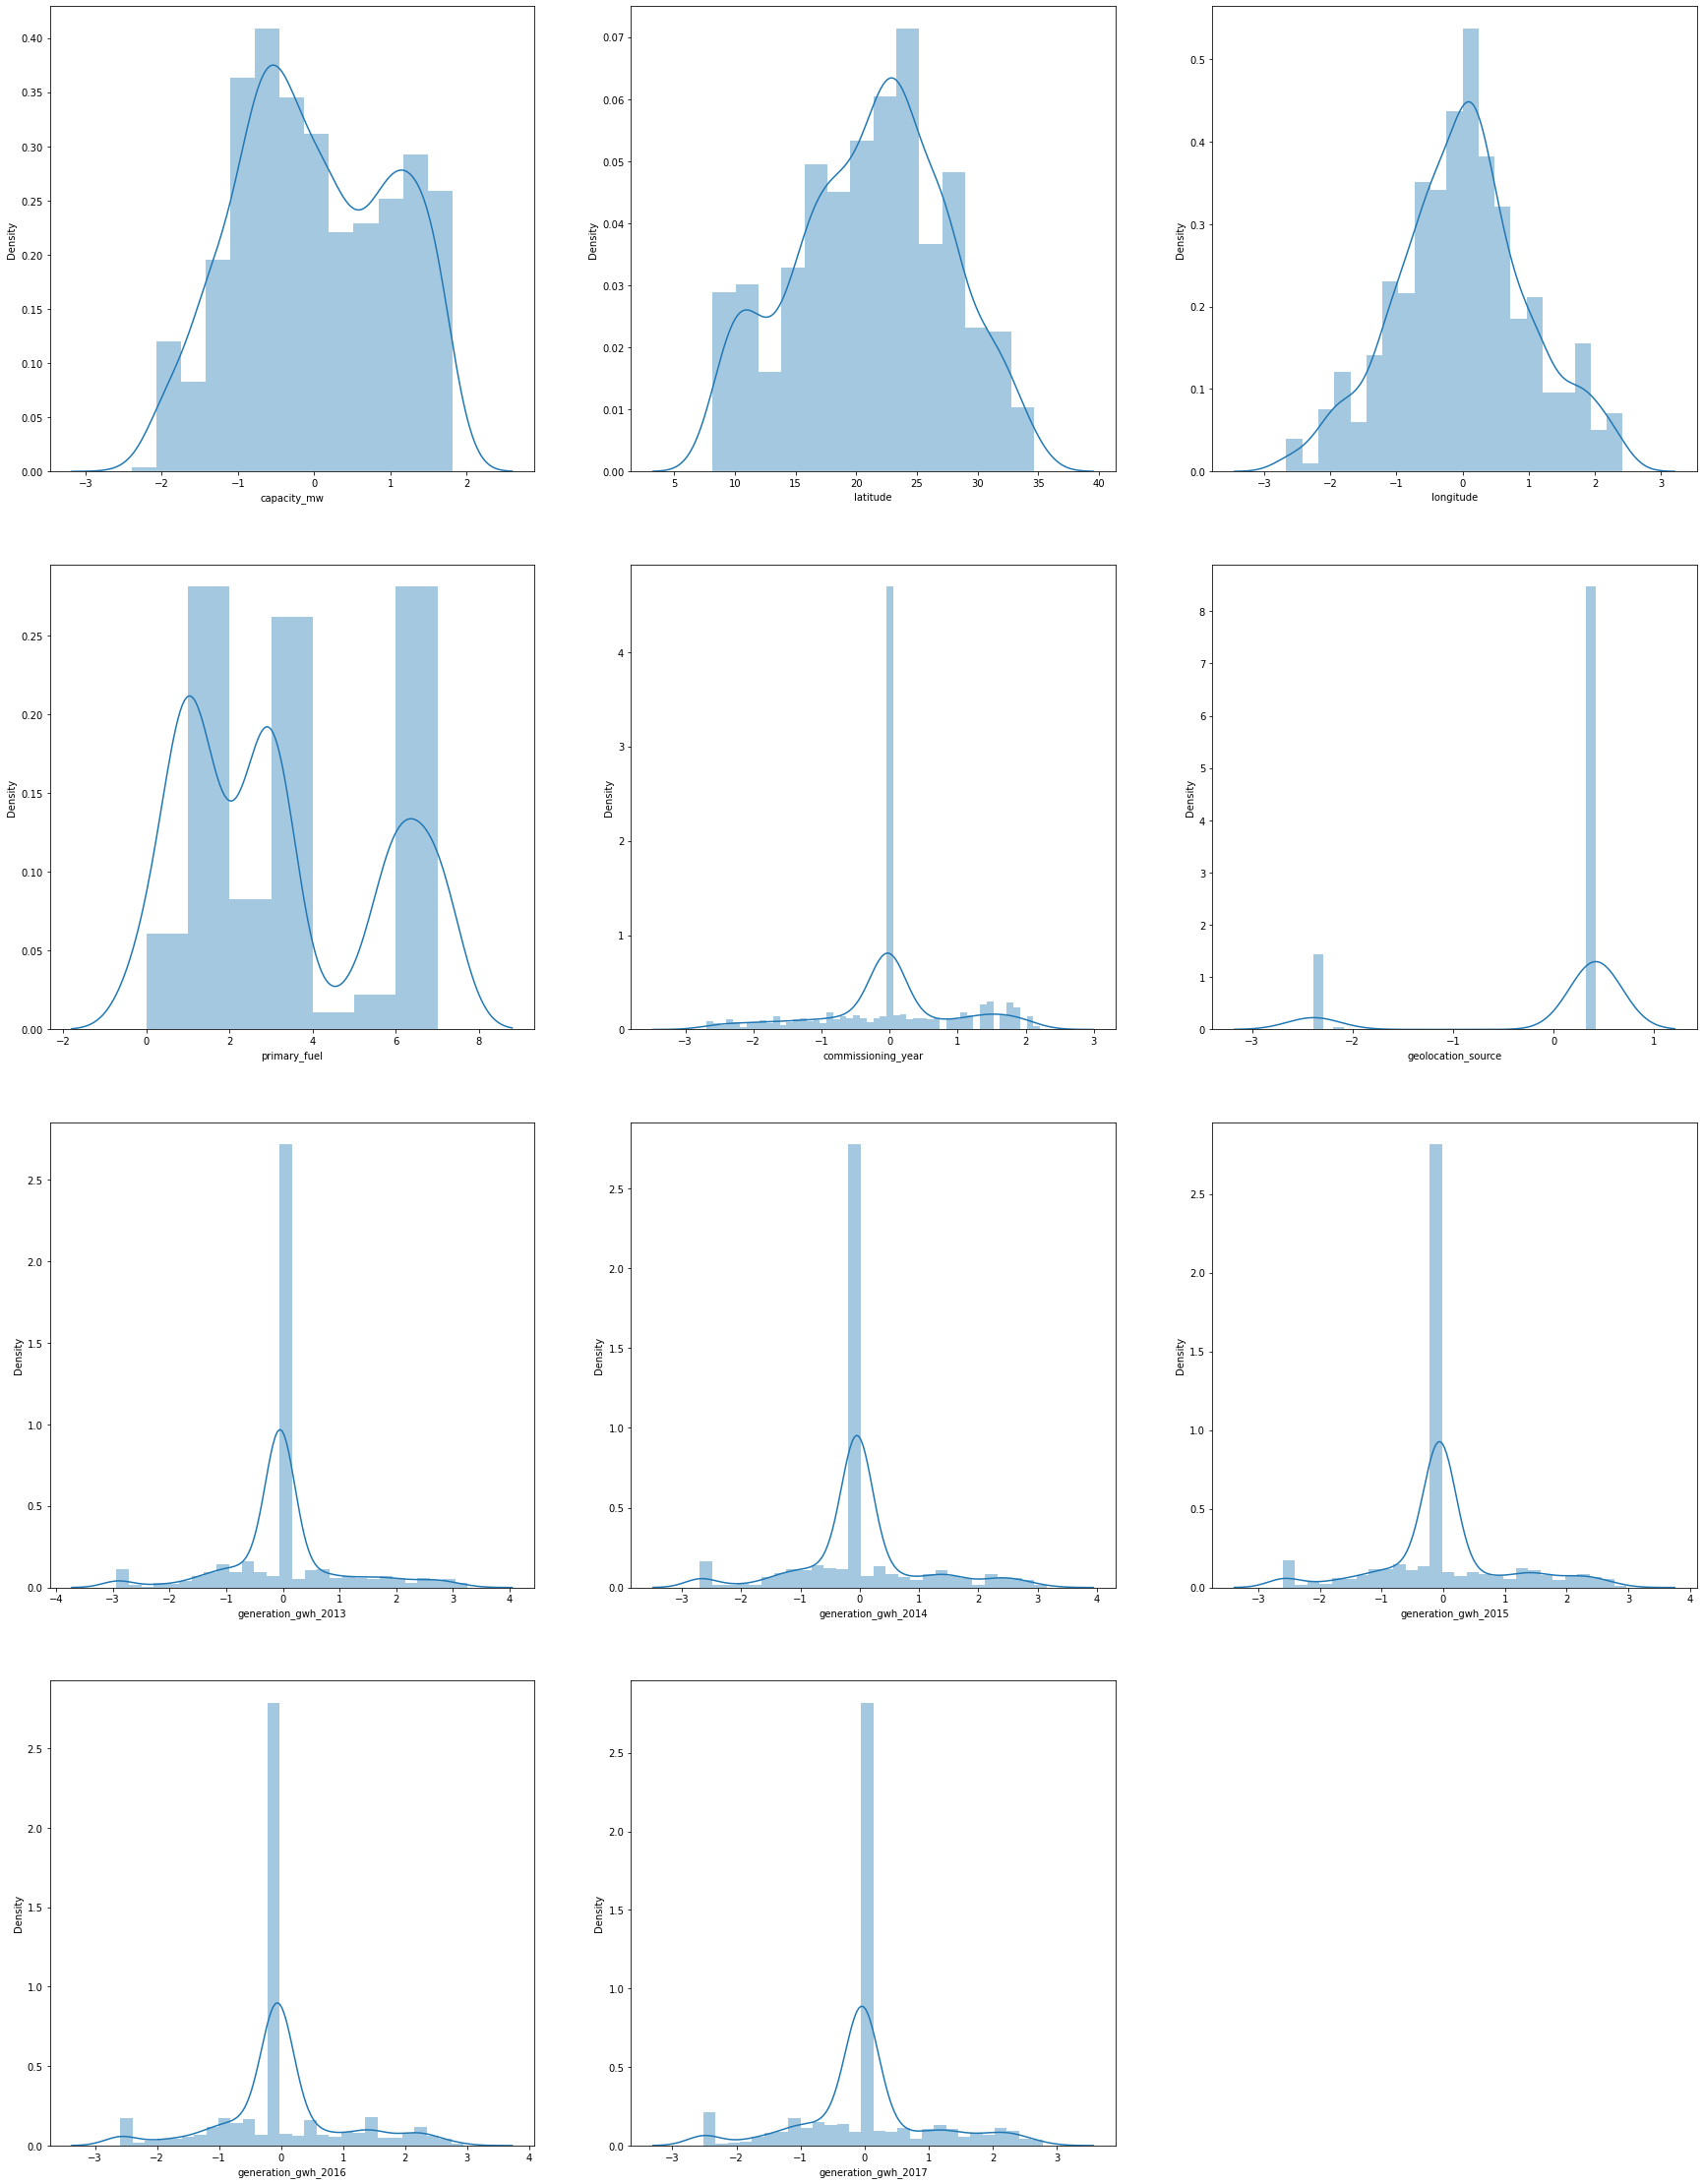

In [47]:
plt.figure(figsize=(30,40))
plotnum=1
for i in gp.columns:
    ax = plt.subplot(4,3,plotnum)
    sns.distplot(gp[i]) 
    plotnum+=1
plt.show()

## Model Building
### 1) Primary Fuel  as target variable  (Classification Model)


In [48]:
X = gp.drop(['primary_fuel'], axis=1)
y = gp['primary_fuel']

In [49]:
Scaler = StandardScaler()
X_scalar = Scaler.fit_transform(X)

In [50]:
max_ac=0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train,y_test = train_test_split(X_scalar, y, test_size=0.25, random_state=i)
    model = LogisticRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>max_ac:
        max_rs=i
        max_ac = acc


print("Random state", max_rs, 'with best accuracy', max_ac)
    

Random state 91 with best accuracy 0.6844660194174758


In [51]:
X_train, X_test, y_train, y_test=train_test_split(X_scalar, y, test_size=0.25, random_state=91)

### 1. Logistic Regression

In [52]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print("********************The Results*************************")
print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')

for i in range(2,15):
    cvs = cross_val_score(lm,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*60)

********************The Results*************************
Accuracy Score:  68.44660194174757 %
Cross Validation Score for cv= 2 is 0.6070559610705597
Cross Validation Score for cv= 3 is 0.6009732360097324
Cross Validation Score for cv= 4 is 0.6095192990764859
Cross Validation Score for cv= 5 is 0.6071027346637103
Cross Validation Score for cv= 6 is 0.6058394160583941
Cross Validation Score for cv= 7 is 0.6070652511330478
Cross Validation Score for cv= 8 is 0.6022391966495335
Cross Validation Score for cv= 9 is 0.6107129585390455
Cross Validation Score for cv= 10 is 0.605877167205407
Cross Validation Score for cv= 11 is 0.6083374283374283
Cross Validation Score for cv= 12 is 0.6071327081557261
Cross Validation Score for cv= 13 is 0.607123778998779
Cross Validation Score for cv= 14 is 0.5997745679218501

 Confusion Matrix: 
 [[ 1  0  0  1  0  0  0  2]
 [ 0 41  2 17  1  0  0  4]
 [ 0  3  5  9  0  2  0  3]
 [ 0  7  0 38  0  0  0  1]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  2  0  1  0  2]
 [ 0

### Lasso Regularization

In [53]:
lass = Lasso()
lass.fit(X_train, y_train)
y_pred = lass.predict(X_test)
print("********************The Results*************************")
#print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')

for i in range(2,15):
    cvs = cross_val_score(lass,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

#print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
#print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*60)

********************The Results*************************
Cross Validation Score for cv= 2 is 0.09856452410461214
Cross Validation Score for cv= 3 is 0.09228770820201433
Cross Validation Score for cv= 4 is 0.09724820945478357
Cross Validation Score for cv= 5 is 0.08705809162359057
Cross Validation Score for cv= 6 is 0.08158622392687294
Cross Validation Score for cv= 7 is 0.07237253579522374
Cross Validation Score for cv= 8 is 0.06806720444565034
Cross Validation Score for cv= 9 is 0.04361183617101367
Cross Validation Score for cv= 10 is 0.055204653810804694
Cross Validation Score for cv= 11 is 0.044115357254862396
Cross Validation Score for cv= 12 is 0.018075141350199192
Cross Validation Score for cv= 13 is 0.06595480322249851
Cross Validation Score for cv= 14 is -0.0007856448455421423
************************************************************


### Ridge Regularization

In [54]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
print("********************The Results*************************")
#print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')

for i in range(2,15):
    cvs = cross_val_score(ridge_reg,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

#print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
#print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*60)

********************The Results*************************
Cross Validation Score for cv= 2 is 0.40074436659084073
Cross Validation Score for cv= 3 is 0.39505525982091844
Cross Validation Score for cv= 4 is 0.4013283013212645
Cross Validation Score for cv= 5 is 0.3898593848152319
Cross Validation Score for cv= 6 is 0.39051277228003656
Cross Validation Score for cv= 7 is 0.3857581731386955
Cross Validation Score for cv= 8 is 0.38467447616457084
Cross Validation Score for cv= 9 is 0.35638271319502246
Cross Validation Score for cv= 10 is 0.37008622542559877
Cross Validation Score for cv= 11 is 0.35628339557142225
Cross Validation Score for cv= 12 is 0.34017340103293686
Cross Validation Score for cv= 13 is 0.3796972116693332
Cross Validation Score for cv= 14 is 0.3097288302738989
************************************************************


### 2. Random Forest Classifier

In [55]:
Rand = RandomForestClassifier()
Rand.fit(X_train, y_train)
y_pred = Rand.predict(X_test)
print("********************The Results*************************")
print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')

for i in range(2,15):
    cvs = cross_val_score(Rand,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*60)

********************The Results*************************
Accuracy Score:  76.2135922330097 %
Cross Validation Score for cv= 2 is 0.7907542579075426
Cross Validation Score for cv= 3 is 0.794403892944039
Cross Validation Score for cv= 4 is 0.8114788065356381
Cross Validation Score for cv= 5 is 0.8054028085735403
Cross Validation Score for cv= 6 is 0.8017031630170317
Cross Validation Score for cv= 7 is 0.8103516069617764
Cross Validation Score for cv= 8 is 0.8127141633352369
Cross Validation Score for cv= 9 is 0.8127621171099431
Cross Validation Score for cv= 10 is 0.816382603585072
Cross Validation Score for cv= 11 is 0.826126126126126
Cross Validation Score for cv= 12 is 0.8139563796533106
Cross Validation Score for cv= 13 is 0.8225923382173383
Cross Validation Score for cv= 14 is 0.8212824580445854

 Confusion Matrix: 
 [[ 2  1  0  0  0  0  0  1]
 [ 0 52  5  4  0  1  0  3]
 [ 0  6  3 10  0  3  0  0]
 [ 0  3  1 42  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  1  1  0  2  0  0]
 [ 0  

### 3. XGBoost Classifier

In [56]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
print("********************The Results*************************")
print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')

for i in range(2,15):
    cvs = cross_val_score(xgbc,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*60)

[20:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********************The Results*************************
Accuracy Score:  81.55339805825243 %
[20:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to

### 4. Support Vector Machine Classifier

In [57]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("********************The Results*************************")
print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')

for i in range(2,15):
    cvs = cross_val_score(svc,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*60)

********************The Results*************************
Accuracy Score:  70.3883495145631 %
Cross Validation Score for cv= 2 is 0.7116788321167884
Cross Validation Score for cv= 3 is 0.7274939172749391
Cross Validation Score for cv= 4 is 0.7250651195832347
Cross Validation Score for cv= 5 is 0.7311234294161124
Cross Validation Score for cv= 6 is 0.7262773722627737
Cross Validation Score for cv= 7 is 0.7238467746942323
Cross Validation Score for cv= 8 is 0.721432990671997
Cross Validation Score for cv= 9 is 0.7262170196952806
Cross Validation Score for cv= 10 is 0.7238025271818984
Cross Validation Score for cv= 11 is 0.7238493038493039
Cross Validation Score for cv= 12 is 0.7298415743108837
Cross Validation Score for cv= 13 is 0.7250267094017093
Cross Validation Score for cv= 14 is 0.723908324288219

 Confusion Matrix: 
 [[ 3  1  0  0  0  0  0  0]
 [ 5 50  4  4  0  0  0  2]
 [ 0  9  1  9  0  0  0  3]
 [ 1  4  0 41  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 2  1  1  1  0  0  0  0]
 [ 0 

### 5. Decision Tree Classifier

In [58]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
print("********************The Results*************************")
print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')

for i in range(2,15):
    cvs = cross_val_score(dec_tree,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*60)

********************The Results*************************
Accuracy Score:  76.69902912621359 %
Cross Validation Score for cv= 2 is 0.7311435523114356
Cross Validation Score for cv= 3 is 0.7566909975669099
Cross Validation Score for cv= 4 is 0.7251124792801327
Cross Validation Score for cv= 5 is 0.7700813008130082
Cross Validation Score for cv= 6 is 0.7639902676399025
Cross Validation Score for cv= 7 is 0.7774466588025911
Cross Validation Score for cv= 8 is 0.7700956596230725
Cross Validation Score for cv= 9 is 0.7713409778627169
Cross Validation Score for cv= 10 is 0.7822215692036439
Cross Validation Score for cv= 11 is 0.7921212121212121
Cross Validation Score for cv= 12 is 0.7749893435635123
Cross Validation Score for cv= 13 is 0.7653388278388278
Cross Validation Score for cv= 14 is 0.7834599649327878

 Confusion Matrix: 
 [[ 3  1  0  0  0  0  0  0]
 [ 1 49  4  7  0  1  0  3]
 [ 0  5 10  3  0  3  0  1]
 [ 0  6  1 39  0  0  0  0]
 [ 0  1  0  1  0  1  0  0]
 [ 0  1  0  1  0  3  0  0]
 [

### Hyperparameter Optimization

#### We can see after Several Model performances, XGBClassifier has accuracy score = 81.55 and best CV score =82.61 which is the least difference, Hence XGB Classifier is the best model

Let us tune the parameters using GridSearchCV

In [59]:
estimator = XGBClassifier(nthread =4, seed=41)
params= {'n_estimators':range(10,30,5), 'max_depth':range(1,9,2), 'learning_rate':[0.01,0.05, 0.10]}

In [60]:
XG_grid = GridSearchCV(estimator=estimator, param_grid=params, n_jobs=2,verbose=2, cv =9)

XG_grid.fit(X_train, y_train)
y_pred = XG_grid.predict(X_test)
print("********************The Results*************************")
print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')
cvs = cross_val_score(XG_grid,X_scalar, y,cv =14) 
print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*60)

Fitting 9 folds for each of 48 candidates, totalling 432 fits
[20:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********************The Results*************************
Accuracy Score:  80.58252427184466 %
Fitting 9 folds for each of 48 candidates, totalling 432 fits
[20:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 9 folds for each of 48 candidates, totalling 432 fits
[20:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:11

## Saving the Best Classifier model

In [61]:
import pickle

file  =open('Global_power_plant_clf','wb')
pickle.dump( XG_grid, file)

## 1) Capacity in mw  as target variable( Regressor Mode)

In [62]:
X = df.drop(['capacity_mw'], axis=1)
y = df['capacity_mw']

NameError: name 'df' is not defined

In [ ]:
Scaler = StandardScaler()
X_scalar = Scaler.fit_transform(X)

In [ ]:
max_ac=0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train,y_test = train_test_split(X_scalar, y, test_size=0.25, random_state=i)
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>max_ac:
        max_rs=i
        max_ac = acc


print("The Random state with best accurcay is", max_rs, 'with accuracy', max_ac)
    

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X_scalar, y, test_size=0.25, random_state=25)

## 1. Linear Regression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


print("********************The Results*************************")
print("Accuracy: ",r2_score(y_test, y_pred)*100)
for i in range(2,15):
    cvs = cross_val_score(lm,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))

print('*'*60)

## 2. Random Forest Regressor

In [ ]:
rand = RandomForestRegressor()
rand.fit(X_train, y_train)
y_pred = lm.predict(X_test)


print("********************The Results*************************")
print("Accuracy: ",r2_score(y_test, y_pred)*100)
for i in range(2,15):
    cvs = cross_val_score(rand,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))

print('*'*60)

## 3. XGB regressor

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)


print("********************The Results*************************")
print("Accuracy: ",r2_score(y_test, y_pred)*100)
for i in range(2,15):
    cvs = cross_val_score(xgbr,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))

print('*'*60)

## 4. Decision tree Regressor

In [ ]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)


print("********************The Results*************************")
print("Accuracy: ",r2_score(y_test, y_pred)*100)
for i in range(2,15):
    cvs = cross_val_score(dec_reg,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))

print('*'*60)

## Hyper parameter tuning

#### We see that XGB Regressor has least difference in r2score: 80.394,  and CV score: 78.0, Hence choosing XGBRegressor as best model

In [ ]:
parameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100],
    "criterion": ["gini", "entropy"]
    }

In [ ]:
XG_rand = RandomizedSearchCV(estimator=xgbr, param_distributions=parameter_grid, n_jobs=2,verbose=2, cv =9)

XG_rand.fit(X_train, y_train)
y_pred = XG_rand.predict(X_test)
print("********************The Results*************************")
print("Accuracy: ",r2_score(y_test, y_pred)*100)
for i in range(2,15):
    cvs = cross_val_score(XG_rand,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))

print('*'*60)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test, y= y_pred, color='g')
plt.plot(y_test,y_pred, color='b')
plt.title("Graph of Actual vs Predicted Capacity in MW")
plt.xlabel('Actual Value ', fontsize= 10 )
plt.ylabel('Predicted Value', fontsize= 10)
plt.show()

## Saving the regressor best model

In [ ]:
import pickle

file = open('Global_Power_Plant_reg','wb')

pickle.dump(XG_rand,file)